 # Candidate Number: 020693

# Classification of MNIST Handwritten Digit Database using Neural Network

Dataset - https://www.kaggle.com/c/digit-recognizer/data

# Linear Neural Network Model

## Import all required libraries

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from subprocess import check_output

## Read train and test datasets

In [2]:
train = pd.read_csv("digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train.iloc[:,1:].values) # take the columns from 2 to end as the x values
y_train = train.iloc[:,0].values.astype('int32') # take 1st column as 7 values
X_test = test.values # take everything from test data

In [5]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

## Data Visualization

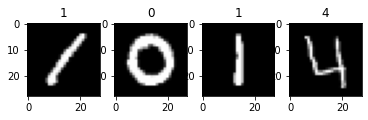

In [7]:
#take 4 images and plot
X_train = X_train.reshape(X_train.shape[0], 28, 28) # reshape the data to plot the images

for i in range(0,4):
    plt.subplot(140 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1) #expand 1 more dimention as 1 for colour channel gray
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [9]:
X_train.shape

(42000, 28, 28, 1)

In [10]:
X_test.shape

(28000, 28, 28, 1)

## Feature Standardization
It is important preprocessing step. It is used to centre the data around zero mean and unit variance.

In [11]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

## One Hot encoding of labels
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [12]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

Lets plot 10th label.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


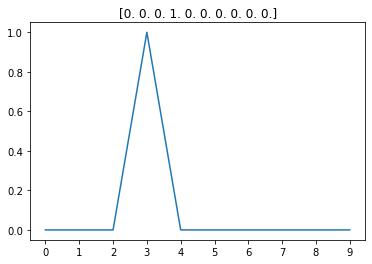

In [13]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

## Create a linear model

In [14]:
np.random.seed(50)
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [15]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1))) # add the function standardize created above
model.add(Flatten())  # Add a flatten layer to the network
model.add(Dense(512, activation='relu'))  # Add a dense layer
model.add(Dense(10, activation='softmax')) # Add the final dense layer
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


## Compile the network

In [16]:
# Create optimizer, loss function and a metrics for the network
from keras.optimizers import RMSprop
model.compile(optimizer='Adam', # optimizer is chosen as Adam optimizer
 loss='categorical_crossentropy',  # Loss is taken as categorical crossentropy
 metrics=['accuracy']) # metrics is accuracy

model.optimizer.lr=0.005 # setting the learning rate of the model same as paper

In [17]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()  # an image data generator which will load one batch of image in every epoch

## Train validation split

In [18]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42) # split the data in train and val with 10% validation data 
batches = gen.flow(X_train, y_train, batch_size=64) # flow the train images in batches of 64
val_batches=gen.flow(X_val, y_val, batch_size=64) # flow the validation images in batches of 64

## Fit the model

In [19]:
history=model.fit_generator(generator=batches, epochs=6, 
                    validation_data=val_batches)  # run the model for 6 epochs same as paper

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/6
591/591 [==============================] - 1s 2ms/step - loss: 0.2748 - accuracy: 0.9211 - val_loss: 0.1714 - val_accuracy: 0.9498
Epoch 2/6
591/591 [==============================] - 1s 2ms/step - loss: 0.1408 - accuracy: 0.9594 - val_loss: 0.1504 - val_accuracy: 0.9598
Epoch 3/6
591/591 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9667 - val_loss: 0.1376 - val_accuracy: 0.9614
Epoch 4/6
591/591 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9696 - val_loss: 0.2162 - val_accuracy: 0.9512
Epoch 5/6
591/591 [==============================] - 1s 2ms/step - loss: 0.1013 - accuracy: 0.9727 - val_loss: 0.1650 - val_accuracy: 0.9633
Epoch 6/6
591/591 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9753 - val_loss: 0.1939 - val_accuracy: 0.9614


## Plot the results

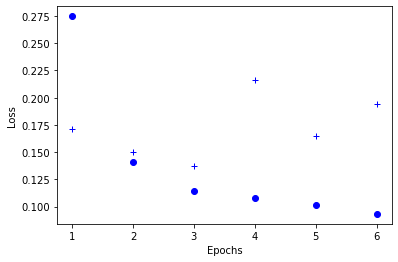

In [20]:
history_dict = history.history # load the history to plot the loss and accuracy with epochs
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

As can be seen from above the loss (train loss - solid points, validaion loss - + sign) are decreasing with epochs.

Plot the accuracy 

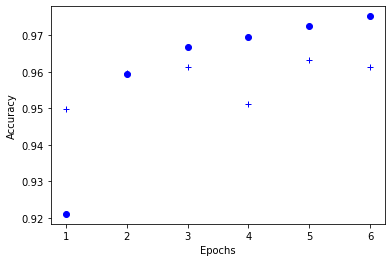

In [21]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

As can be seen from above the accuracies (train acc - solid points, validaion acc - + sign) are increasing with epochs.

In [22]:
res={}
res['model_name']=['Original']
res['accuracy']=[np.round(history_dict['val_accuracy'][-1]*100,2)]

In [23]:
res

{'model_name': ['Original'], 'accuracy': [96.14]}

# Autoencode Model

In [24]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1))) # add the function standardize created above
model.add(Flatten())  # Add a flatten layer to the network
model.add(Dense(6, activation='relu')) # add a layer with size less than 10 to make it autoencoder
model.add(Dense(10, activation='softmax')) # Add the final dense layer
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [25]:
# Create optimizer, loss function and a metrics for the network
from keras.optimizers import RMSprop
model.compile(optimizer='Adam', # optimizer is chosen as Adam optimizer
 loss='categorical_crossentropy',  # Loss is taken as categorical crossentropy
 metrics=['accuracy']) # metrics is accuracy

model.optimizer.lr=0.005 # setting the learning rate of the model same as paper

## Fit the model

In [26]:
history=model.fit_generator(generator=batches, epochs=6, 
                    validation_data=val_batches)  # run the model for 6 epochs same as paper

Epoch 1/6
591/591 [==============================] - 1s 1ms/step - loss: 0.7116 - accuracy: 0.7750 - val_loss: 0.4672 - val_accuracy: 0.8640
Epoch 2/6
591/591 [==============================] - 1s 1ms/step - loss: 0.4268 - accuracy: 0.8786 - val_loss: 0.4218 - val_accuracy: 0.8840
Epoch 3/6
591/591 [==============================] - 1s 1ms/step - loss: 0.4053 - accuracy: 0.8829 - val_loss: 0.4112 - val_accuracy: 0.8840
Epoch 4/6
591/591 [==============================] - 1s 1ms/step - loss: 0.3893 - accuracy: 0.8884 - val_loss: 0.4488 - val_accuracy: 0.8802
Epoch 5/6
591/591 [==============================] - 1s 1ms/step - loss: 0.3839 - accuracy: 0.8908 - val_loss: 0.4003 - val_accuracy: 0.8871
Epoch 6/6
591/591 [==============================] - 1s 1ms/step - loss: 0.3721 - accuracy: 0.8935 - val_loss: 0.3962 - val_accuracy: 0.8843


## Plot the results

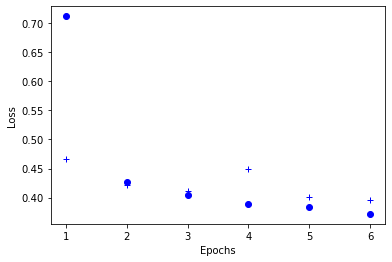

In [27]:
history_dict = history.history # load the history to plot the loss and accuracy with epochs
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [28]:
res['model_name'].append('Autoencoder')
res['accuracy'].append(np.round(history_dict['val_accuracy'][-1]*100,2))

# Convolutional Neural Network

In [29]:
from keras.layers import Convolution2D, MaxPooling2D

# create and function to create the CNN model
def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)), # add the function to standardise the data
        Convolution2D(32,(3,3), activation='relu'), # add a CNN layer with relu activation function
        MaxPooling2D(),                             # add a maxpooling layer
        Convolution2D(64,(3,3), activation='relu'),  # add a CNN layer with relu activation function
        MaxPooling2D(),                              # add a maxpooling layer
        Flatten(),                                   # flatten the layers
        Dense(512, activation='relu'),               # add a dense layer
        Dense(10, activation='softmax')              # add final dense layer
        ])
    model.compile(Adam(), loss='categorical_crossentropy',  # compile the model with adam optimizer, loss function and metrics
                  metrics=['accuracy'])
    return model

In [30]:
model= get_cnn_model()  # create the model using above function
model.optimizer.lr=0.005 # change the learning rate of the model

In [32]:
history=model.fit_generator(generator=batches, epochs=6, # run the model for 6 epochs
                    validation_data=val_batches)

Epoch 1/6
591/591 [==============================] - 11s 18ms/step - loss: 0.2144 - accuracy: 0.9374 - val_loss: 0.1048 - val_accuracy: 0.9683
Epoch 2/6
591/591 [==============================] - 11s 18ms/step - loss: 0.0798 - accuracy: 0.9760 - val_loss: 0.0733 - val_accuracy: 0.9793
Epoch 3/6
591/591 [==============================] - 11s 19ms/step - loss: 0.0627 - accuracy: 0.9793 - val_loss: 0.0642 - val_accuracy: 0.9807
Epoch 4/6
591/591 [==============================] - 11s 18ms/step - loss: 0.0541 - accuracy: 0.9825 - val_loss: 0.0679 - val_accuracy: 0.9798
Epoch 5/6
591/591 [==============================] - 12s 20ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0705 - val_accuracy: 0.9812
Epoch 6/6
591/591 [==============================] - 11s 19ms/step - loss: 0.0479 - accuracy: 0.9857 - val_loss: 0.0890 - val_accuracy: 0.9740


## Plot the losses

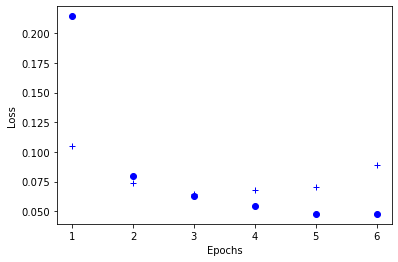

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history # load the history to plot the loss and accuracy with epochs
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [34]:
res['model_name'].append('CNN')
res['accuracy'].append(np.round(history_dict['val_accuracy'][-1]*100,2))

results=pd.DataFrame(res)

results['batch_size']=100
results['learning_rate']=0.005
results['number of epochs']=6

In [35]:
results[['batch_size','learning_rate', 'number of epochs','model_name', 'accuracy' 
       ]]

,batch_size,learning_rate,number of epochs,model_name,accuracy
0,100,0.005,6,Original,96.14
1,100,0.005,6,Autoencoder,88.43
2,100,0.005,6,CNN,97.40


### Comparison with method discussed in lecutres ( Desicision tree)

In [36]:
train = pd.read_csv("digit-recognizer/train.csv")
test= pd.read_csv("digit-recognizer/test.csv")

X_train = (train.iloc[:,1:].values) # take the columns from 2 to end as the x values
y_train = train.iloc[:,0].values.astype('int32') # take 1st column as 7 values
#split the train and test data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) # split the data in train and val with 10% validation data 

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0) # fit a decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
clf.score(X_val,y_val) # score the model on the test data

0.8523809523809524

As can be seen from above, we compared the accuracies of decision tree model with the neural network and CNN models and the results are better in case of neural network. The neural network and CNN networks always works better than the traditional method on image data and the CNN model can learn the complex featured from the images which is difficult to get from the traditional methods.

In [39]:
pd.concat([results,pd.DataFrame({'batch_size':['None'],'learning_rate':['None'],'number of epochs':['None'],'model_name':['Decision Tree'],'accuracy':[85.23]})],axis=0)[['batch_size','learning_rate', 'number of epochs','model_name', 'accuracy' 
       ]]

,batch_size,learning_rate,number of epochs,model_name,accuracy
0,100,0.005,6,Original,96.14
1,100,0.005,6,Autoencoder,88.43
2,100,0.005,6,CNN,97.40
0,None,None,None,Decision Tree,85.23
